In [1]:
import numpy as np

from finquant.portfolio import *
from finquant.moving_average import compute_ma, ema

import quantstats as qs

import pandas as pd
import datetime

import yfinance as yf
import riskfolio.Portfolio as pf
import riskfolio.PlotFunctions as plf
import riskfolio.RiskFunctions as rf
import matplotlib as plt
import  statsmodels .api  as  sm 
from  sklearn.linear_model  import  LinearRegression
import  cvxpy  as  cv
from scipy.stats import norm
from sklearn.metrics import mean_squared_error

In [2]:
df_health = pd.read_csv('tick_score_health.csv')
df_tech = pd.read_csv('tick_score_tech.csv')
df_durable = pd.read_csv('tick_score_durable.csv')
df_nondurable = pd.read_csv('tick_score_nondurable.csv')
df_capital = pd.read_csv('tick_score_capital.csv')
df_transport = pd.read_csv('tick_score_transport.csv')
df_util = pd.read_csv('tick_score_util.csv')
df_services = pd.read_csv('tick_score_services.csv')
df_energy = pd.read_csv('tick_score_energy.csv')
df_finance = pd.read_csv('tick_score_finance.csv')
df_basics = pd.read_csv('tick_score_basics.csv')


frames = [df_finance, df_capital, df_durable, df_energy, df_health, df_nondurable, df_services, df_tech, df_services, df_util, df_basics]
df = pd.concat(frames)
df = df.drop_duplicates(subset=['Unnamed: 0'], keep='last')
df = df.set_index("Unnamed: 0")

percentile = np.percentile(df['Score'], 90)
mu, std = norm.fit(df['Score'])
roc = std / 3
aplus = df[df['Score'] > percentile - roc*4
#aplus = df[df['Score'] > mu + (roc*4)]
#aplus = df[df['Score'] > mu + (roc*6)]
tickers = list(aplus.index)

In [3]:
start = "2016-01-01"
end = "2020-12-30"
future_end = "2021-03-31"

In [4]:
pf = build_portfolio(names=tickers, start_date = start, end_date = end, data_api="yfinance", )

[*********************100%***********************]  48 of 48 completed


\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


                  Expected Return  Volatility  Sharpe Ratio
Min Volatility           0.747840    0.400332      0.968796
Max Sharpe Ratio         0.871566    0.422602      1.210515
                       MCO      SPGI       TRV       BEN       MTD       JHX  \
Min Volatility    0.006510  0.022266  0.040988  0.014833  0.026615  0.000422   
Max Sharpe Ratio  0.015124  0.033618  0.006802  0.013696  0.042003  0.025641   

                        BA       HON       CLX      KMB       DVN       OXY  \
Min Volatility    0.010525  0.026384  0.039701  0.03292  0.002644  0.035400   
Max Sharpe Ratio  0.029450  0.025605  0.023571  0.00838  0.014402  0.005454   

                       EOG      FANG       EMR       CMI       PSX      GILD  \
Min Volatility    0.002186  0.001466  0.002375  0.023438  0.027582  0.019121   
Max Sharpe Ratio  0.009839  0.017595  0.045135  0.006274  0.009439  0.007386   

                      ABBV       HCA       IQV      IDXX       BTI        PM  \
Min Volatility    0.

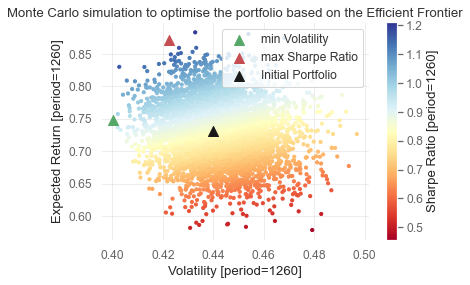

In [5]:
pf.freq = 1260
pf.risk_free_rate = 0.36
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)      # Monte Carlo weights and results
print(opt_res)                                            # Plot stats for optimals

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # Make pandas return whole df
    print(opt_w)

#plt.figure(figsize=(22,14))


pf.mc_plot_results()

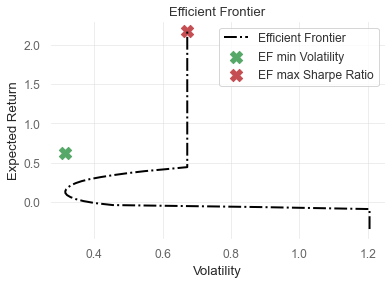

In [6]:
pf.ef_plot_efrontier()

pf.ef_plot_optimal_portfolios()

[*********************100%***********************]  48 of 48 completed
----------------------------------------------------------------------
Stocks: MCO, SPGI, TRV, BEN, MTD, JHX, BA, HON, CLX, KMB, DVN, OXY, EOG, FANG, EMR, CMI, PSX, GILD, ABBV, HCA, IQV, IDXX, BTI, PM, MDLZ, DPZ, DEO, KDP, PEP, KO, CL, EL, VRSN, IHG, BKNG, AZO, SPG, YUM, KEP, D, NGG, LNG, BCE, LYB, LIN, APD, IFF, PPG
Time window/frequency: 1260
Risk free rate: 0.36
Portfolio Expected Return: 0.872
Portfolio Volatility: 0.423
Portfolio Sharpe Ratio: 1.211

Skewness:
        MCO      SPGI       TRV       BEN       MTD       JHX        BA  \
0  0.518393  0.571178  0.100438 -0.526128  0.609571  1.498047  0.036496   

        HON       CLX       KMB  ...       KEP         D       NGG       LNG  \
0  0.259578  1.187317  0.616726  ...  0.461348  0.363784  0.370885 -0.174082   

        BCE       LYB      LIN       APD       IFF       PPG  
0  0.024432  0.002708  0.54683  0.865392 -0.264189  0.897645  

[1 rows x 48 columns

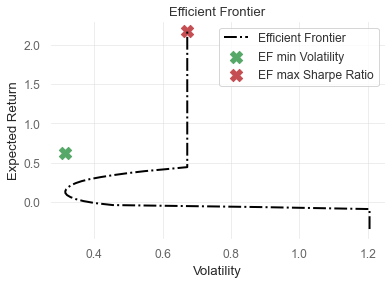

In [7]:
weights = pd.DataFrame(opt_w.loc["Max Sharpe Ratio"])
weights = weights.reset_index()
weights.columns = ["Name", "Allocation"]
#display(weights)
pf2 = build_portfolio(names=tickers, start_date = start, end_date = end, data_api="yfinance", pf_allocation = weights)
pf2.freq = 1260
pf2.risk_free_rate = 0.36
pf2.ef_plot_efrontier()
pf2.ef_plot_optimal_portfolios()
pf2.properties()

In [8]:
data = yf.download(tickers, start = start, end = end, threads = False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%***********************]  48 of 48 completed


[*********************100%***********************]  4 of 4 completed


PRWAX    66.169272
SWPPX    83.268981
WFIVX    42.547109
^GSPC    85.179811
dtype: float64

PRWAX       SWPPX       WFIVX       ^GSPC
Date                                                      
2016-01-05   99.975533  100.193048  100.171335  100.201223
2016-01-06   99.021523   98.938224   98.914903   98.887044
2016-01-07   96.061642   96.589448   96.516273   96.543377
2016-01-08   95.009783   95.527672   95.431176   95.497004
2016-01-11   94.863008   95.624194   95.431176   95.578489
...                ...         ...         ...         ...
2020-12-22  164.995096  181.306302  143.061102  183.203320
2020-12-23  165.092945  181.435005  143.232436  183.339955
2020-12-24  165.166328  182.110678  143.632206  183.988354
2020-12-28  166.071423  183.687260  144.545969  185.593197
2020-12-29  166.169272  183.268981  142.547109  185.179811

[1256 rows x 4 columns]

Date
2016-01-05    100.130457
2016-01-06     98.832013
2016-01-07     96.220070
2016-01-08     95.444731
2016-01-11     95.167997
                 ...    
2020-12-22    190.510439
2020-12-23    192.490144
2020-12-24    192.754862
2020-12-28    193.436805
2020-12-29    193.235944
Length: 1256, dtype: float64


<AxesSubplot:xlabel='Date'>

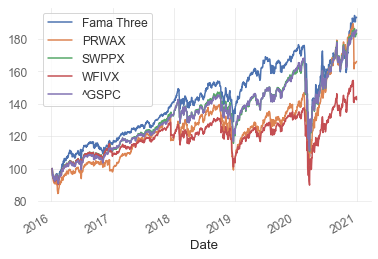

In [9]:
comparisons = ["^GSPC", "WFIVX", "PRWAX", "SWPPX"]
sp_500 = yf.download(tickers=comparisons, start=start, end=end, threads = False)
sp_500 = sp_500.loc[:,('Close')]
sp_500_total_cum_return = ((sp_500.iloc[-1] - sp_500.iloc[0]) / sp_500.iloc[0])*100
display(sp_500_total_cum_return)
sp_500_daily = sp_500.pct_change().fillna(100)[1:]
compare_port = (sp_500_daily + 1).cumprod()
compare_port *= 100
compare_port = pd.DataFrame(compare_port)
display(compare_port)

Y_cum = data[tickers].pct_change().fillna(0)[1:]
weights = weights.set_index("Name")    
for tick in weights.index:
    Y_cum.loc[:,tick] *= weights.loc[tick].values
port_ret = Y_cum.sum(axis=1)
Y_cum_ret = (port_ret + 1).cumprod()
Y_cum_ret *= 100
print(Y_cum_ret)



pfcr = pd.DataFrame(Y_cum_ret)
pfcr.columns = ["Fama Three"]
newdf = pfcr.join(compare_port)

newdf.plot()

In [10]:
#weights = weights.set_index("Name")
qs.stats.sharpe(port_ret, rf=0.36, periods=1260)
#ax = plf.plot_pie(w=weights, title='Monte Carlo Model', others=0.05, nrow = 25, cmap = "tab20", height=6, width=10, ax=None)

1.0290963984245889

\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)


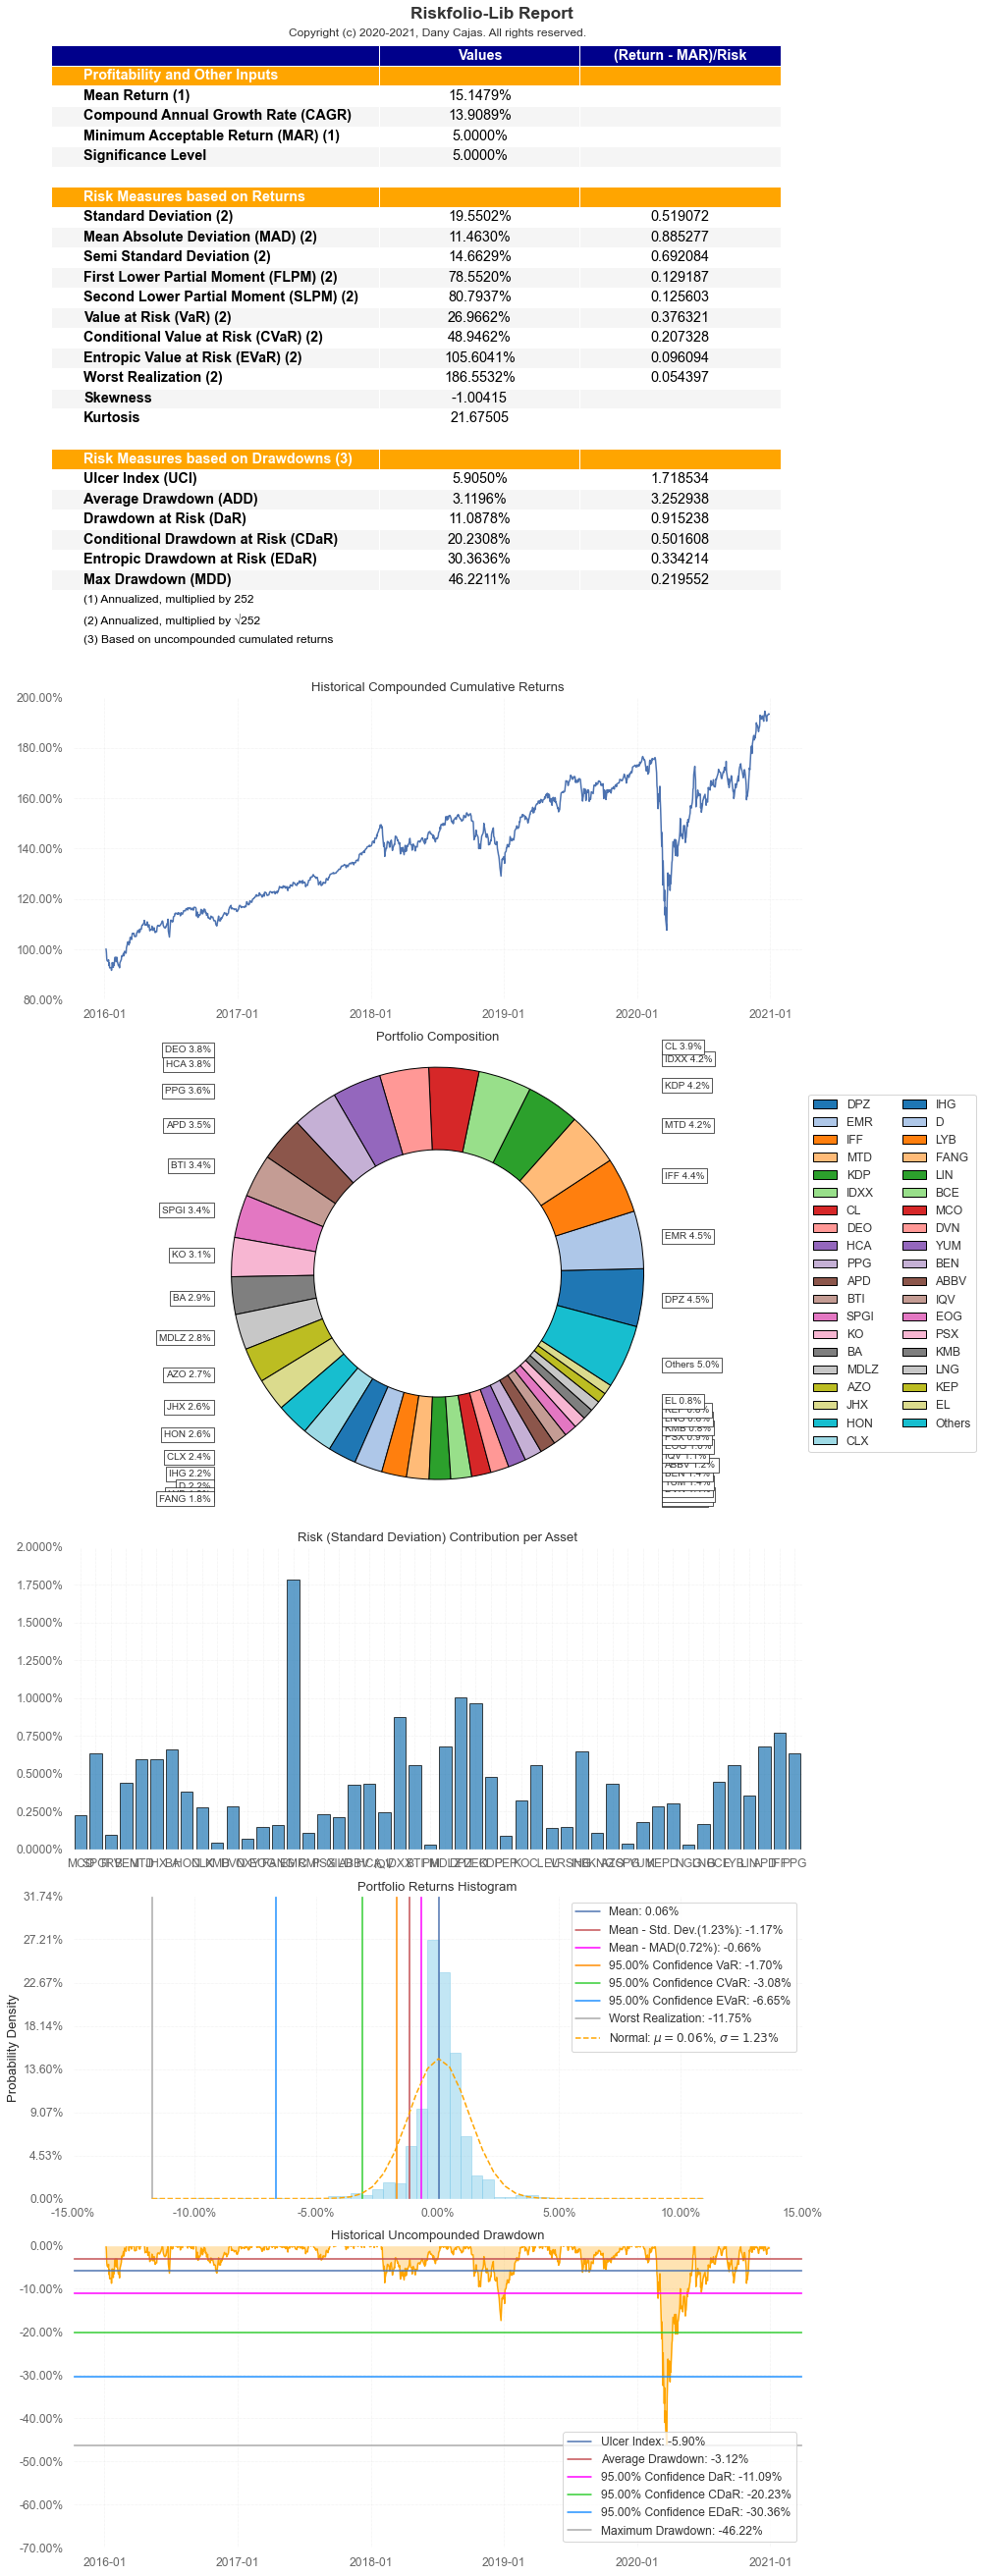

In [11]:
import riskfolio.Reports as rp
port_diff = data[tickers].pct_change().dropna()

ax_report = rp.jupyter_report(port_diff, w=weights, rm='MV', rf=0.05, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)

In [12]:
#display(weights)
data = yf.download(list(weights.index), start = start, end = end, threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values
    
data = data.mean(axis=1)
port_diff = pd.DataFrame(data.pct_change().dropna())
port_diff.columns = ["Close"]
avg_daily_return = port_diff.mean()["Close"]
std_dev_daily_return = port_diff.std()["Close"]


[*********************100%***********************]  48 of 48 completed


In [13]:
# Set number of trading days and get last closing prices of all companies in the Portfolio  from DataFrame
num_simulations = 1000
num_trading_days = 60 
stock_last_price = port_diff['Close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    # Initialize the simulated prices list with the last closing price of TSLA
    simulated_ticker_prices = [stock_last_price]

        # Simulate the returns for 252  trading days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        # Append the simulated price to the list
        simulated_ticker_prices.append(simulated_price)
    
    # Append the simulated prices of each simulation to DataFrame
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)



<AxesSubplot:title={'center':'1000 Simulations of Portfolio Stock Price Trajectory Over the Next 60 Trading Days'}>

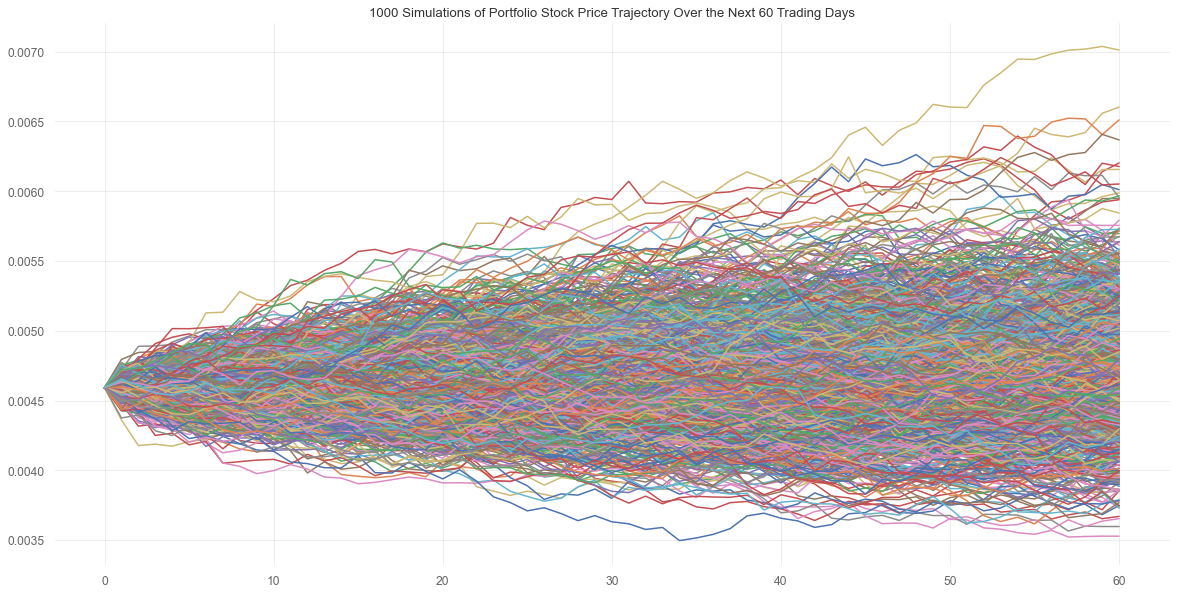

In [14]:
plot_title = f"{n+1} Simulations of Portfolio Stock Price Trajectory Over the Next 60 Trading Days"
simulated_price_df.plot(legend=None, title=plot_title, figsize =[20,10])

In [15]:
simulated_ending_prices = simulated_price_df.iloc[-1, :]

In [16]:
# Use the `value_counts` function to create the frequency distribution and 
# sort the data into 20 bins. Divide the value counts of each bin by the total
# number of prices to return the probability of each range
simulated_ending_prices.value_counts(bins=20) / len(simulated_ending_prices)

(0.00457, 0.00475]    0.160
(0.00475, 0.00492]    0.141
(0.0044, 0.00457]     0.131
(0.00422, 0.0044]     0.118
(0.00492, 0.0051]     0.100
(0.0051, 0.00527]     0.084
(0.00527, 0.00544]    0.073
(0.00405, 0.00422]    0.071
(0.00388, 0.00405]    0.043
(0.00544, 0.00562]    0.031
(0.0037, 0.00388]     0.016
(0.00562, 0.00579]    0.013
(0.00252, 0.0037]     0.004
(0.00579, 0.00597]    0.004
(0.00597, 0.00614]    0.004
(0.00614, 0.00632]    0.003
(0.00649, 0.00666]    0.002
(0.00632, 0.00649]    0.001
(0.00684, 0.00701]    0.001
(0.00666, 0.00684]    0.000
Name: 60, dtype: float64

In [17]:
import matplotlib.pyplot as pyplt

[*********************100%***********************]  48 of 48 completed
[*********************100%***********************]  48 of 48 completed


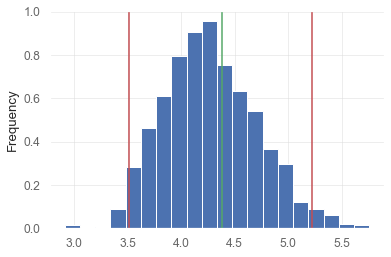

In [19]:
data = yf.download(list(weights.index), start = start, end = end, threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values
    
data = pd.DataFrame(data.mean(axis=1))
data.columns = ["Close"]
port_diff = pd.DataFrame(data.pct_change().dropna())
port_diff.columns = ["Close"]
avg_daily_return = port_diff.mean()["Close"]
std_dev_daily_return = port_diff.std()["Close"]


# Set number of trading days and get last closing price of TSLA from DataFrame
num_simulations = 1000
num_trading_days = 60
stock_last_price = data['Close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    simulated_ticker_prices = [stock_last_price]

    for i in range(num_trading_days):
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        simulated_ticker_prices.append(simulated_price)
    
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)


simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.value_counts(bins=20) / len(simulated_ending_prices)
confidence_interval = simulated_ending_prices.quantile(q=[0.025, 0.975])

data = yf.download(list(weights.index), start = end, end = future_end, threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values

data = data.mean(axis=1)
port_diff = pd.DataFrame(data.pct_change().dropna())
actual_price = data.iloc[-1]

simulated_ending_prices.plot(kind='hist', density=True, bins=20)
pyplt.axvline(confidence_interval.iloc[0], color='r')
pyplt.axvline(confidence_interval.iloc[1], color='r')
pyplt.axvline(actual_price, color='g')

[*********************100%***********************]  48 of 48 completed
[*********************100%***********************]  48 of 48 completed


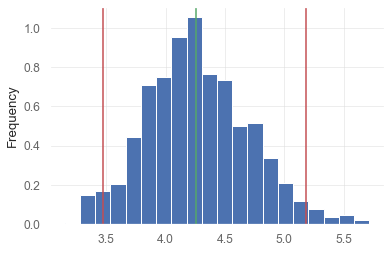

In [20]:
data = yf.download(list(weights.index), start = start, end = end, threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values
    
data = pd.DataFrame(data.mean(axis=1))
data.columns = ["Close"]
port_diff = pd.DataFrame(data.pct_change().dropna())
port_diff.columns = ["Close"]
avg_daily_return = port_diff.mean()["Close"]
std_dev_daily_return = port_diff.std()["Close"]


# Set number of trading days and get last closing price of TSLA from DataFrame
num_simulations = 1000
num_trading_days = 60
stock_last_price = data['Close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    simulated_ticker_prices = [stock_last_price]

    for i in range(num_trading_days):
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        simulated_ticker_prices.append(simulated_price)
    
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)


simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.value_counts(bins=20) / len(simulated_ending_prices)
confidence_interval = simulated_ending_prices.quantile(q=[0.025, 0.975])

data = yf.download(list(weights.index), start = "2021-03-22", end = "2021-03-24", threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values

data = data.mean(axis=1)
port_diff = pd.DataFrame(data.pct_change().dropna())
actual_price = data.iloc[-1]

simulated_ending_prices.plot(kind='hist', density=True, bins=20)
pyplt.axvline(confidence_interval.iloc[0], color='r')
pyplt.axvline(confidence_interval.iloc[1], color='r')
pyplt.axvline(actual_price, color='g')

In [47]:
data = yf.download(list(weights.index), start = start, end = end, threads = False)
data = data.loc[:,('Close', slice(None))]
#print(data)
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values

data = pd.DataFrame(data.mean(axis=1))
data.columns = ["Close"]
port_diff = pd.DataFrame(data.pct_change().dropna())
port_diff.columns = ["Close"]
avg_daily_return = port_diff.mean()["Close"]
std_dev_daily_return = port_diff.std()["Close"]


# Set number of trading days and get last closing price of TSLA from DataFrame
num_simulations = 1000
num_trading_days = 7
stock_last_price = data['Close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    simulated_ticker_prices = [stock_last_price]

    for i in range(num_trading_days):
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        simulated_ticker_prices.append(simulated_price)
    
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)

[*********************100%***********************]  48 of 48 completed


In [57]:
real_data = yf.download(list(weights.index), start = "2020-12-29", end = "2021-01-09", threads = False)
real_data = real_data.loc[:,('Close', slice(None))]
real_data.columns = list(weights.index)

for col in real_data.columns:
    real_data.loc[:,col] *= weights.loc[col].values

real_data = real_data.mean(axis=1)
real_data = real_data.reset_index()
real_data = real_data.drop(columns=["Date"])


[*********************100%***********************]  48 of 48 completed


In [58]:
display(len(real_data))

8

In [59]:
mse = mean_squared_error(real_data, simulated_price_df.mean(axis=1))
print(mse)

0.00287910512505814


'\npyplt.plot(simulated_price_df.max(axis=1), label = "Max")\npyplt.plot(simulated_price_df.min(axis=1), label = "Min")\npyplt.plot(simulated_price_df.mean(axis=1), label = "Mean")\npyplt.plot(real_data, label = "Portfolio Real Value")\n#pyplt.xlabel = "Days from moment of prediction"\n#pyplt.ylabel = "Portfolio Price"\npyplt.legend()\npyplt.xlabel(\'Days from moment of prediction\')\npyplt.ylabel(\'Portfolio Price\')\n'

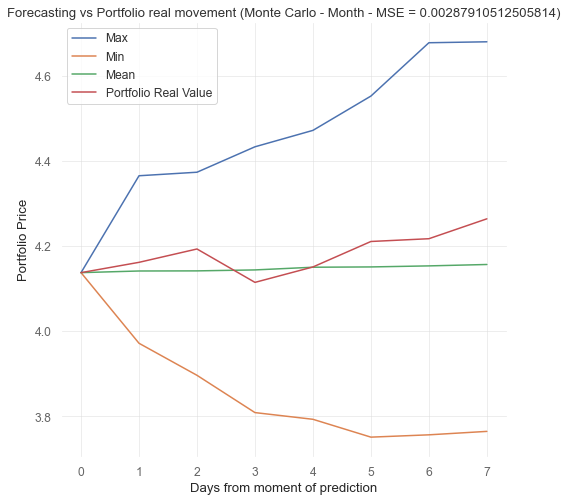

In [61]:
#pyplt.figure()
fig, ax = pyplt.subplots(figsize=(8,8)) # width & height 
ax.plot(simulated_price_df.max(axis=1), label = "Max")
ax.plot(simulated_price_df.min(axis=1), label = "Min")
ax.plot(simulated_price_df.mean(axis=1), label = "Mean")
ax.plot(real_data, label = "Portfolio Real Value")
ax.legend()
ax.set(title=f"Forecasting vs Portfolio real movement (Monte Carlo - Month - MSE = {mse})", 
        xlabel="Days from moment of prediction",
        ylabel="Portfolio Price")

'''
pyplt.plot(simulated_price_df.max(axis=1), label = "Max")
pyplt.plot(simulated_price_df.min(axis=1), label = "Min")
pyplt.plot(simulated_price_df.mean(axis=1), label = "Mean")
pyplt.plot(real_data, label = "Portfolio Real Value")
#pyplt.xlabel = "Days from moment of prediction"
#pyplt.ylabel = "Portfolio Price"
pyplt.legend()
pyplt.xlabel('Days from moment of prediction')
pyplt.ylabel('Portfolio Price')
'''